In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train_dir = '/content/drive/MyDrive/det/train'
test_dir = '/content/drive/MyDrive/det/test'


In [13]:
BATCH_SIZE = 5
IMG_SHAPE  = 500

In [14]:
train_small_dir = train_dir + '/small'
train_big_dir = train_dir + '/big'
test_small_dir = test_dir + '/small'
test_small_dir = test_dir + '/big'

image_gen_train = ImageDataGenerator(
      rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

test_image_generator = ImageDataGenerator(rescale=1./255)  
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary')

Found 43 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 249, 249, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 123, 123, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 60, 60, 128)     

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [22]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

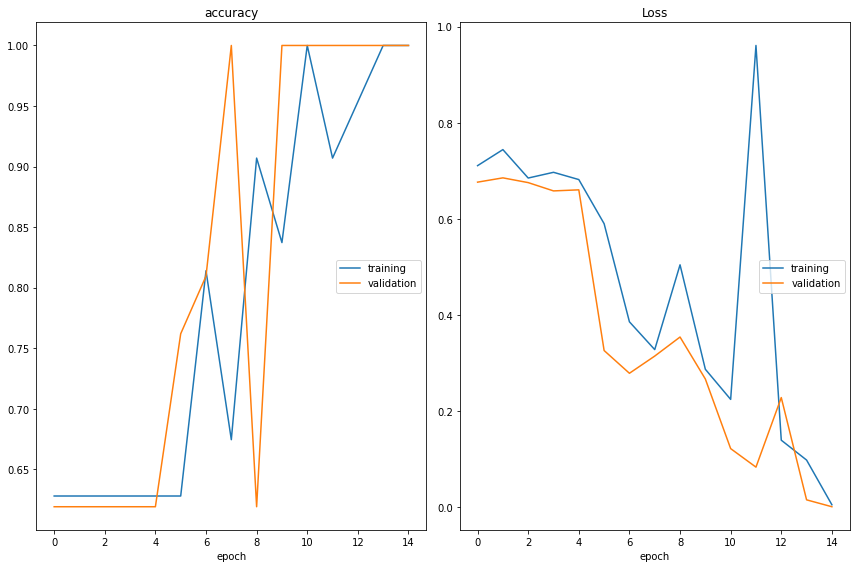

accuracy
	training         	 (min:    0.628, max:    1.000, cur:    1.000)
	validation       	 (min:    0.619, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.004, max:    0.961, cur:    0.004)
	validation       	 (min:    0.000, max:    0.685, cur:    0.000)
9/9 [==============================] - 16s 2s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.7509e-04 - val_accuracy: 1.0000


In [23]:
EPOCHS = 15
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=test_data_gen,
    callbacks=[PlotLossesCallback()])

In [27]:
model.save('my_model.h5')